In [1]:
import numpy as np
import pandas as pd
import time
inicio_ejecucion = time.time()

In [4]:
import pandas as pd
url_features_clean_unbalanced='https://raw.githubusercontent.com/joaquinzepeda/Datos/main/datos%20supernovas/features_clean_unbalanced.csv'
features_clean_unbalanced = pd.read_csv(url_features_clean_unbalanced, index_col=None)
features_clean_unbalanced = features_clean_unbalanced.set_index('oid')

In [5]:
features_clean_unbalanced['classALeRCE']= features_clean_unbalanced['classALeRCE'].replace(['SNIIb','SNIIn'],'SNII')
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_2,delta_period_2,MHPS_ratio_1,MHPS_low_1,...,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.069774,51.560655,24.510580,3.971278,...,2.329822,11.688865,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.185710,0.029147,0.752135,0.016245,...,3.344742,24.821418,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056146,999.999953,998.994608,337.794556,34.621597,...,2.939173,22.204705,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNII
ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,37.037036,36.008675,0.751511,0.199288,...,3.554814,14.225585,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
ZTF18aaermez,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.183438,0.066186,3.026673,0.060769,...,8.207399,21.426885,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,142.857138,37.884766,191.005722,13.320155,...,3.176701,24.208459,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,76.923075,2.993114,112.711197,14.528273,...,6.300816,10.058062,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,3.911379,0.107875,...,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa


In [6]:
count_clase2 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase2 = count_clase2.groupby(count_clase2.columns.tolist(),as_index=False).size()
count_clase2

,classALeRCE,size
0,SLSN,33
1,SNII,339
2,SNIa,1278
3,SNIbc,82


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # se codifica la clase
le = LabelEncoder()


X, y = features_clean_unbalanced.iloc[:,:-1], features_clean_unbalanced['classALeRCE']
# label encode the target variable
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
pred_labels = []
accuracy = []
presicion = []
recall = []
iteraciones = []
for i in range(1,20):
    iteraciones.append(i)
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred_labels_0 = neigh.predict(X_test)
    pred_labels.append(pred_labels_0)
    # calculate accuracy
    from sklearn import metrics
    accuracy_0= metrics.accuracy_score(y_test, pred_labels_0)*100
    presicion_0 = metrics.precision_score(y_test, pred_labels_0,average='macro')*100
    recall_0 = metrics.recall_score(y_test, pred_labels_0,average='macro')*100
    print("Classification accuracy is %2f"%accuracy_0,"%",f'n_neighbors={i}')
    print("Classification precision is %2f"%presicion_0,"%",f'n_neighbors={i}')
    print("Classification recall is %2f"%recall_0,"%",f'n_neighbors={i}\n')
    accuracy.append(accuracy_0)
    presicion.append(presicion_0)
    recall.append(recall_0)


Classification accuracy is 76.441516 % n_neighbors=1
Classification precision is 41.206157 % n_neighbors=1
Classification recall is 37.808179 % n_neighbors=1

Classification accuracy is 77.924217 % n_neighbors=2
Classification precision is 63.392574 % n_neighbors=2
Classification recall is 42.440466 % n_neighbors=2

Classification accuracy is 79.901153 % n_neighbors=3
Classification precision is 57.231753 % n_neighbors=3
Classification recall is 39.518349 % n_neighbors=3

Classification accuracy is 80.560132 % n_neighbors=4
Classification precision is 56.892597 % n_neighbors=4
Classification recall is 40.873660 % n_neighbors=4

Classification accuracy is 80.724876 % n_neighbors=5
Classification precision is 64.117790 % n_neighbors=5
Classification recall is 41.430704 % n_neighbors=5

Classification accuracy is 80.065898 % n_neighbors=6
Classification precision is 56.341879 % n_neighbors=6
Classification recall is 38.048493 % n_neighbors=6

Classification accuracy is 80.230643 % n_neigh

C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages

Classification recall is 35.389535 % n_neighbors=13

Classification accuracy is 79.571664 % n_neighbors=14
Classification precision is 37.920909 % n_neighbors=14
Classification recall is 34.962185 % n_neighbors=14

Classification accuracy is 79.901153 % n_neighbors=15
Classification precision is 38.237340 % n_neighbors=15
Classification recall is 35.075052 % n_neighbors=15

Classification accuracy is 80.230643 % n_neighbors=16
Classification precision is 38.800902 % n_neighbors=16
Classification recall is 35.187918 % n_neighbors=16

Classification accuracy is 79.901153 % n_neighbors=17
Classification precision is 38.779470 % n_neighbors=17
Classification recall is 34.760568 % n_neighbors=17

Classification accuracy is 79.736409 % n_neighbors=18
Classification precision is 38.640130 % n_neighbors=18
Classification recall is 34.546893 % n_neighbors=18

Classification accuracy is 79.736409 % n_neighbors=19
Classification precision is 38.640130 % n_neighbors=19
Classification recall is 34.

C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages

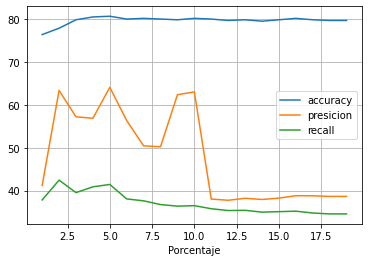

In [34]:
# plot lines
plt.plot(iteraciones, accuracy, label = "accuracy")
plt.plot(iteraciones, presicion, label = "presicion")
plt.plot(iteraciones, recall, label = "recall")
plt.grid()
plt.xlabel('iteraciones')
plt.xlabel('Porcentaje')
plt.legend()

In [35]:
y_sin_codificar = le.inverse_transform(y)
np.unique(y),np.unique(y_sin_codificar)
df = pd.DataFrame()
df['ClassALeRCE']=np.unique(y_sin_codificar)
df['Codificación']=np.unique(y)
df

,ClassALeRCE,Codificación
0,SLSN,0
1,SNII,1
2,SNIa,2
3,SNIbc,3


In [36]:
count_clase3 = pd.DataFrame({'y_train':y_train})
count_clase3 = count_clase3.groupby(count_clase3.columns.tolist(),as_index=False).size()
count_clase3 

,y_train,size
0,0,21
1,1,222
2,2,835
3,3,47


In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # se codifica la clase

le = LabelEncoder()

# transform the dataset
# clase 0 : SLSN, clase 1: SNII, clase 2: SNIa,clase 3 = SNIbc
oversample = SMOTE(sampling_strategy = {0: count_clase3['size'][0]*10, 1: count_clase3['size'][1]*2, 2: count_clase3['size'][2]*1, 3: count_clase3['size'][3]*8})
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.fit_transform(X_test)


In [49]:
count_clase5 = pd.DataFrame({'classALeRCE': y_train_smote})
count_clase5.groupby(count_clase5.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,0,210
1,1,444
2,2,835
3,3,376


In [71]:
from sklearn.neighbors import KNeighborsClassifier
pred_labels = []
accuracy = []
presicion = []
recall = []
iteraciones = []
for i in range(1,650):
    iteraciones.append(i)
    neigh = KNeighborsClassifier(n_neighbors=i,weights='distance')
    neigh.fit(X_train_smote, y_train_smote)
    pred_labels_0 = neigh.predict(X_test)
    pred_labels.append(pred_labels_0)
    # calculate accuracy
    from sklearn import metrics
    accuracy_0= metrics.accuracy_score(y_test, pred_labels_0)*100
    presicion_0 = metrics.precision_score(y_test, pred_labels_0,average='macro')*100
    recall_0 = metrics.recall_score(y_test, pred_labels_0,average='macro')*100
    print("Classification accuracy is %2f"%accuracy_0,"%",f'n_neighbors={i}')
    print("Classification precision is %2f"%presicion_0,"%",f'n_neighbors={i}')
    print("Classification recall is %2f"%recall_0,"%",f'n_neighbors={i}\n')
    accuracy.append(accuracy_0)
    presicion.append(presicion_0)
    recall.append(recall_0)

Classification accuracy is 64.415157 % n_neighbors=1
Classification precision is 41.323204 % n_neighbors=1
Classification recall is 46.128324 % n_neighbors=1

Classification accuracy is 64.415157 % n_neighbors=2
Classification precision is 41.323204 % n_neighbors=2
Classification recall is 46.128324 % n_neighbors=2

Classification accuracy is 64.085667 % n_neighbors=3
Classification precision is 43.550119 % n_neighbors=3
Classification recall is 50.487639 % n_neighbors=3

Classification accuracy is 63.920923 % n_neighbors=4
Classification precision is 43.444458 % n_neighbors=4
Classification recall is 50.116722 % n_neighbors=4

Classification accuracy is 61.614498 % n_neighbors=5
Classification precision is 43.116670 % n_neighbors=5
Classification recall is 50.327875 % n_neighbors=5

Classification accuracy is 62.767710 % n_neighbors=6
Classification precision is 43.351847 % n_neighbors=6
Classification recall is 49.750573 % n_neighbors=6

Classification accuracy is 60.131796 % n_neigh

Classification accuracy is 54.695222 % n_neighbors=57
Classification precision is 47.190916 % n_neighbors=57
Classification recall is 54.976221 % n_neighbors=57

Classification accuracy is 54.365733 % n_neighbors=58
Classification precision is 47.439613 % n_neighbors=58
Classification recall is 54.863354 % n_neighbors=58

Classification accuracy is 55.518946 % n_neighbors=59
Classification precision is 47.965991 % n_neighbors=59
Classification recall is 55.415630 % n_neighbors=59

Classification accuracy is 54.859967 % n_neighbors=60
Classification precision is 47.564085 % n_neighbors=60
Classification recall is 54.374802 % n_neighbors=60

Classification accuracy is 54.859967 % n_neighbors=61
Classification precision is 47.444150 % n_neighbors=61
Classification recall is 54.374802 % n_neighbors=61

Classification accuracy is 55.024712 % n_neighbors=62
Classification precision is 47.544565 % n_neighbors=62
Classification recall is 54.588477 % n_neighbors=62

Classification accuracy is 5

Classification accuracy is 57.495881 % n_neighbors=112
Classification precision is 48.087094 % n_neighbors=112
Classification recall is 54.094816 % n_neighbors=112

Classification accuracy is 57.331137 % n_neighbors=113
Classification precision is 47.573321 % n_neighbors=113
Classification recall is 54.592336 % n_neighbors=113

Classification accuracy is 57.331137 % n_neighbors=114
Classification precision is 48.114134 % n_neighbors=114
Classification recall is 55.250188 % n_neighbors=114

Classification accuracy is 57.660626 % n_neighbors=115
Classification precision is 48.311541 % n_neighbors=115
Classification recall is 55.520297 % n_neighbors=115

Classification accuracy is 58.154860 % n_neighbors=116
Classification precision is 48.193277 % n_neighbors=116
Classification recall is 55.846839 % n_neighbors=116

Classification accuracy is 57.990115 % n_neighbors=117
Classification precision is 48.529863 % n_neighbors=117
Classification recall is 55.289795 % n_neighbors=117

Classifica

Classification accuracy is 59.143328 % n_neighbors=163
Classification precision is 48.842813 % n_neighbors=163
Classification recall is 53.132860 % n_neighbors=163

Classification accuracy is 58.978583 % n_neighbors=164
Classification precision is 48.599826 % n_neighbors=164
Classification recall is 52.919185 % n_neighbors=164

Classification accuracy is 59.308072 % n_neighbors=165
Classification precision is 49.054741 % n_neighbors=165
Classification recall is 53.032052 % n_neighbors=165

Classification accuracy is 58.978583 % n_neighbors=166
Classification precision is 48.102465 % n_neighbors=166
Classification recall is 50.892285 % n_neighbors=166

Classification accuracy is 59.308072 % n_neighbors=167
Classification precision is 47.845759 % n_neighbors=167
Classification recall is 51.005152 % n_neighbors=167

Classification accuracy is 59.143328 % n_neighbors=168
Classification precision is 47.997924 % n_neighbors=168
Classification recall is 50.948719 % n_neighbors=168

Classifica

Classification accuracy is 59.637562 % n_neighbors=214
Classification precision is 48.548178 % n_neighbors=214
Classification recall is 49.988441 % n_neighbors=214

Classification accuracy is 59.802306 % n_neighbors=215
Classification precision is 48.725853 % n_neighbors=215
Classification recall is 50.044875 % n_neighbors=215

Classification accuracy is 60.296540 % n_neighbors=216
Classification precision is 49.061360 % n_neighbors=216
Classification recall is 50.371417 % n_neighbors=216

Classification accuracy is 60.131796 % n_neighbors=217
Classification precision is 48.779240 % n_neighbors=217
Classification recall is 50.157741 % n_neighbors=217

Classification accuracy is 60.296540 % n_neighbors=218
Classification precision is 49.061360 % n_neighbors=218
Classification recall is 50.371417 % n_neighbors=218

Classification accuracy is 59.802306 % n_neighbors=219
Classification precision is 48.725853 % n_neighbors=219
Classification recall is 50.044875 % n_neighbors=219

Classifica

Classification accuracy is 61.285008 % n_neighbors=266
Classification precision is 49.580522 % n_neighbors=266
Classification recall is 49.894923 % n_neighbors=266

Classification accuracy is 61.449753 % n_neighbors=267
Classification precision is 49.847536 % n_neighbors=267
Classification recall is 49.951356 % n_neighbors=267

Classification accuracy is 61.120264 % n_neighbors=268
Classification precision is 49.792303 % n_neighbors=268
Classification recall is 49.838490 % n_neighbors=268

Classification accuracy is 61.120264 % n_neighbors=269
Classification precision is 49.553082 % n_neighbors=269
Classification recall is 49.838490 % n_neighbors=269

Classification accuracy is 61.285008 % n_neighbors=270
Classification precision is 49.580522 % n_neighbors=270
Classification recall is 49.894923 % n_neighbors=270

Classification accuracy is 61.285008 % n_neighbors=271
Classification precision is 49.580522 % n_neighbors=271
Classification recall is 49.894923 % n_neighbors=271

Classifica

Classification accuracy is 63.261944 % n_neighbors=318
Classification precision is 52.360550 % n_neighbors=318
Classification recall is 52.127298 % n_neighbors=318

Classification accuracy is 63.756178 % n_neighbors=319
Classification precision is 52.451797 % n_neighbors=319
Classification recall is 52.296599 % n_neighbors=319

Classification accuracy is 63.756178 % n_neighbors=320
Classification precision is 52.451797 % n_neighbors=320
Classification recall is 52.296599 % n_neighbors=320

Classification accuracy is 63.756178 % n_neighbors=321
Classification precision is 52.451797 % n_neighbors=321
Classification recall is 52.296599 % n_neighbors=321

Classification accuracy is 63.756178 % n_neighbors=322
Classification precision is 52.451797 % n_neighbors=322
Classification recall is 52.296599 % n_neighbors=322

Classification accuracy is 63.920923 % n_neighbors=323
Classification precision is 52.996877 % n_neighbors=323
Classification recall is 52.510274 % n_neighbors=323

Classifica

Classification accuracy is 66.392092 % n_neighbors=369
Classification precision is 53.759769 % n_neighbors=369
Classification recall is 53.042291 % n_neighbors=369

Classification accuracy is 66.556837 % n_neighbors=370
Classification precision is 54.342645 % n_neighbors=370
Classification recall is 53.255967 % n_neighbors=370

Classification accuracy is 66.556837 % n_neighbors=371
Classification precision is 54.342645 % n_neighbors=371
Classification recall is 53.255967 % n_neighbors=371

Classification accuracy is 66.556837 % n_neighbors=372
Classification precision is 54.887125 % n_neighbors=372
Classification recall is 53.255967 % n_neighbors=372

Classification accuracy is 66.886326 % n_neighbors=373
Classification precision is 54.958094 % n_neighbors=373
Classification recall is 53.368833 % n_neighbors=373

Classification accuracy is 66.556837 % n_neighbors=374
Classification precision is 54.688359 % n_neighbors=374
Classification recall is 52.598114 % n_neighbors=374

Classifica

Classification accuracy is 68.204283 % n_neighbors=420
Classification precision is 53.887976 % n_neighbors=420
Classification recall is 45.451560 % n_neighbors=420

Classification accuracy is 68.204283 % n_neighbors=421
Classification precision is 53.870715 % n_neighbors=421
Classification recall is 45.451560 % n_neighbors=421

Classification accuracy is 68.698517 % n_neighbors=422
Classification precision is 55.272116 % n_neighbors=422
Classification recall is 45.778102 % n_neighbors=422

Classification accuracy is 68.533773 % n_neighbors=423
Classification precision is 54.452130 % n_neighbors=423
Classification recall is 45.063817 % n_neighbors=423

Classification accuracy is 68.369028 % n_neighbors=424
Classification precision is 54.416221 % n_neighbors=424
Classification recall is 45.007383 % n_neighbors=424

Classification accuracy is 68.698517 % n_neighbors=425
Classification precision is 55.040198 % n_neighbors=425
Classification recall is 45.120250 % n_neighbors=425

Classifica

Classification accuracy is 72.817133 % n_neighbors=472
Classification precision is 56.969147 % n_neighbors=472
Classification recall is 45.058139 % n_neighbors=472

Classification accuracy is 72.652389 % n_neighbors=473
Classification precision is 56.911009 % n_neighbors=473
Classification recall is 45.001705 % n_neighbors=473

Classification accuracy is 72.981878 % n_neighbors=474
Classification precision is 56.983536 % n_neighbors=474
Classification recall is 45.114572 % n_neighbors=474

Classification accuracy is 72.981878 % n_neighbors=475
Classification precision is 56.983536 % n_neighbors=475
Classification recall is 45.114572 % n_neighbors=475

Classification accuracy is 73.146623 % n_neighbors=476
Classification precision is 57.044719 % n_neighbors=476
Classification recall is 45.171006 % n_neighbors=476

Classification accuracy is 73.311367 % n_neighbors=477
Classification precision is 57.107542 % n_neighbors=477
Classification recall is 45.227439 % n_neighbors=477

Classifica

Classification accuracy is 75.288303 % n_neighbors=523
Classification precision is 49.277496 % n_neighbors=523
Classification recall is 36.009610 % n_neighbors=523

Classification accuracy is 75.453048 % n_neighbors=524
Classification precision is 49.399718 % n_neighbors=524
Classification recall is 36.066044 % n_neighbors=524

Classification accuracy is 75.617792 % n_neighbors=525
Classification precision is 49.537907 % n_neighbors=525
Classification recall is 36.279719 % n_neighbors=525

Classification accuracy is 75.782537 % n_neighbors=526
Classification precision is 49.666477 % n_neighbors=526
Classification recall is 36.336152 % n_neighbors=526

Classification accuracy is 75.782537 % n_neighbors=527
Classification precision is 49.666477 % n_neighbors=527
Classification recall is 36.336152 % n_neighbors=527

Classification accuracy is 75.617792 % n_neighbors=528
Classification precision is 49.537907 % n_neighbors=528
Classification recall is 36.279719 % n_neighbors=528

Classifica

Classification accuracy is 76.771005 % n_neighbors=573
Classification precision is 53.522988 % n_neighbors=573
Classification recall is 34.543954 % n_neighbors=573

Classification accuracy is 76.935750 % n_neighbors=574
Classification precision is 53.729986 % n_neighbors=574
Classification recall is 34.600387 % n_neighbors=574

Classification accuracy is 76.771005 % n_neighbors=575
Classification precision is 52.616075 % n_neighbors=575
Classification recall is 34.043343 % n_neighbors=575

Classification accuracy is 76.935750 % n_neighbors=576
Classification precision is 52.789149 % n_neighbors=576
Classification recall is 34.099777 % n_neighbors=576

Classification accuracy is 77.100494 % n_neighbors=577
Classification precision is 54.050090 % n_neighbors=577
Classification recall is 34.814063 % n_neighbors=577

Classification accuracy is 76.771005 % n_neighbors=578
Classification precision is 52.524944 % n_neighbors=578
Classification recall is 33.886102 % n_neighbors=578

Classifica

Classification accuracy is 76.606260 % n_neighbors=624
Classification precision is 54.990577 % n_neighbors=624
Classification recall is 33.014574 % n_neighbors=624

Classification accuracy is 76.606260 % n_neighbors=625
Classification precision is 54.990577 % n_neighbors=625
Classification recall is 33.014574 % n_neighbors=625

Classification accuracy is 76.606260 % n_neighbors=626
Classification precision is 54.990577 % n_neighbors=626
Classification recall is 33.014574 % n_neighbors=626

Classification accuracy is 76.606260 % n_neighbors=627
Classification precision is 54.990577 % n_neighbors=627
Classification recall is 33.014574 % n_neighbors=627

Classification accuracy is 76.606260 % n_neighbors=628
Classification precision is 54.990577 % n_neighbors=628
Classification recall is 33.014574 % n_neighbors=628

Classification accuracy is 76.771005 % n_neighbors=629
Classification precision is 55.189848 % n_neighbors=629
Classification recall is 33.071008 % n_neighbors=629

Classifica

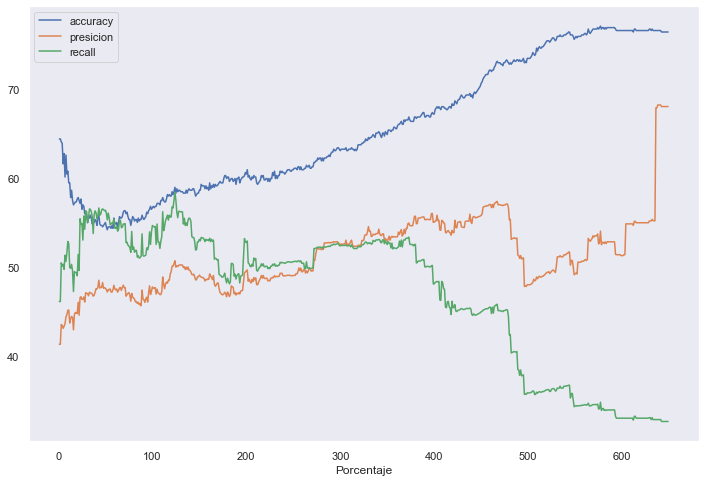

In [76]:
# plot lines
plt.plot(iteraciones, accuracy, label = "accuracy")
plt.plot(iteraciones, presicion, label = "presicion")
plt.plot(iteraciones, recall, label = "recall")
plt.grid()
plt.xlabel('iteraciones')
plt.xlabel('Porcentaje')
plt.legend()

In [73]:
accuracy.index(max(accuracy[1:500])),recall.index(max(recall)),presicion.index(max(presicion[1:500])) 

(494, 123, 466)

In [74]:
pred_labels_468 =pred_labels[468] 
pred_labels_476 =pred_labels[476] 

Text(84.5, 0.5, 'True Label')

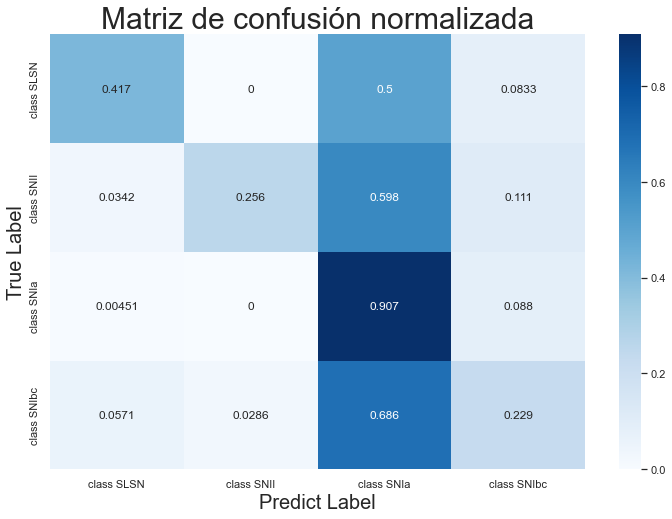

In [75]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn


columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]


confm = confusion_matrix(y_test, pred_labels_476,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)